In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



This package contains the functions for the Lasso.

In [2]:
yields <- read.csv('yields_minutes.csv')
dates <- read.csv('date_concordance.csv')
names(dates) <- c("mpc_meeting", "Date")
data <- merge(yields, dates, by='Date')
dt <- read.csv('dt_mat_bigram.csv')
names(dt)[1] <- 'mpc_meeting'
data.final <- merge(data, dt, by="mpc_meeting")
head(data.final)

mpc_meeting,Date,Gilt1yspot,Gilt1y,Gilt2y,Gilt3y,Gilt4y,Gilt5y,Gilt5y5y,industri.consum,⋯,rate.corpor,overtim.hour,smaller.contribut,appear.eas,market.expect,contract.risen,euro.sterl,terrorist.attack,fallen.follow,overal.earn
199801,19980211,0.002429746,0.03312920,0.030678825,-0.01435721,-0.057308161,-0.091045780,-0.124385580,0,⋯,0,0,0,0,0,0,0,0,0,0
199802,19980311,0.015732897,0.04441172,0.001611517,-0.01277119,-0.015835659,-0.013192621,-0.007168556,0,⋯,0,0,0,0,1,0,0,0,0,0
199803,19980415,-0.002571490,0.01167064,0.017445777,0.01075282,0.003846553,0.000764373,0.006593893,0,⋯,0,0,0,0,1,0,0,0,0,0
199804,19980513,0.021535530,0.01653388,0.024665601,0.02064004,0.012463373,0.005374951,-0.001094451,0,⋯,0,0,0,0,3,0,0,0,0,0
199805,19980610,-0.017118464,-0.02734854,-0.047039015,-0.06101586,-0.075585896,-0.090106819,-0.111665591,0,⋯,0,1,0,0,2,0,0,0,0,0
199806,19980715,0.096883994,0.09478475,0.090726155,0.08853946,0.077815392,0.064109228,0.030317579,0,⋯,0,1,0,0,3,0,0,0,0,1


Here we read in data on UK yield curve movements, and the bigram counts from MPC minutes.

In [3]:
fit <- glmnet(as.matrix(data.final[,-(1:9)]),
              data.final$Gilt1yspot,
              alpha=1,
              standardize=TRUE)

This is the function that fits the LASSO. The first argument is the $X$ matrix of covariates, which are all but the first and second columns of GrowthData. The second argument is the $y$ vector of values for the dependent variable. The third argument specifies the LASSO penalty (an $\alpha \in (0,1)$ is an elastic net regression, and $\alpha=0$ is a ridge regression), and is actually also the default so could have been omitted. The fourth argument is also the default, but introduced for pedagogic reasions. It is important to standardize the variables in a penalized regression so that units of measurement don't affect which variables get penalized.

In [4]:
length(fit$lambda)
fit$lambda

[1] 96

[1] 0.0142378177 0.0135906869 0.0129729692 0.0123833277 0.0118204863
 [6] 0.0112832270 0.0107703869 0.0102808562 0.0098135754 0.0093675333
[11] 0.0089417644 0.0085353474 0.0081474027 0.0077770907 0.0074236099
[16] 0.0070861954 0.0067641169 0.0064566773 0.0061632114 0.0058830839
[21] 0.0056156887 0.0053604469 0.0051168064 0.0048842396 0.0046622434
[26] 0.0044503372 0.0042480625 0.0040549815 0.0038706764 0.0036947482
[31] 0.0035268161 0.0033665169 0.0032135035 0.0030674448 0.0029280247
[36] 0.0027949415 0.0026679071 0.0025466466 0.0024308976 0.0023204095
[41] 0.0022149433 0.0021142707 0.0020181739 0.0019264447 0.0018388849
[46] 0.0017553047 0.0016755234 0.0015993683 0.0015266745 0.0014572848
[51] 0.0013910490 0.0013278236 0.0012674720 0.0012098634 0.0011548733
[56] 0.0011023825 0.0010522775 0.0010044499 0.0009587961 0.0009152173
[61] 0.0008736193 0.0008339119 0.0007960094 0.0007598295 0.0007252941
[66] 0.0006923283 0.0006608610 0.0006308238 0.0006021519 0.0005747832
[71] 0.0005486584 0.0005237210 0.0004999171 0.0004771951 0.0004555058
[76] 0.0004348024 0.0004150399 0.0003961757 0.0003781689 0.0003609806
[81] 0.0003445734 0.0003289121 0.0003139625 0.0002996924 0.0002860709
[86] 0.0002730686 0.0002606572 0.0002488099 0.0002375011 0.0002267063
[91] 0.0002164022 0.0002065664 0.0001971776 0.0001882156 0.0001796609
[96] 0.0001714950

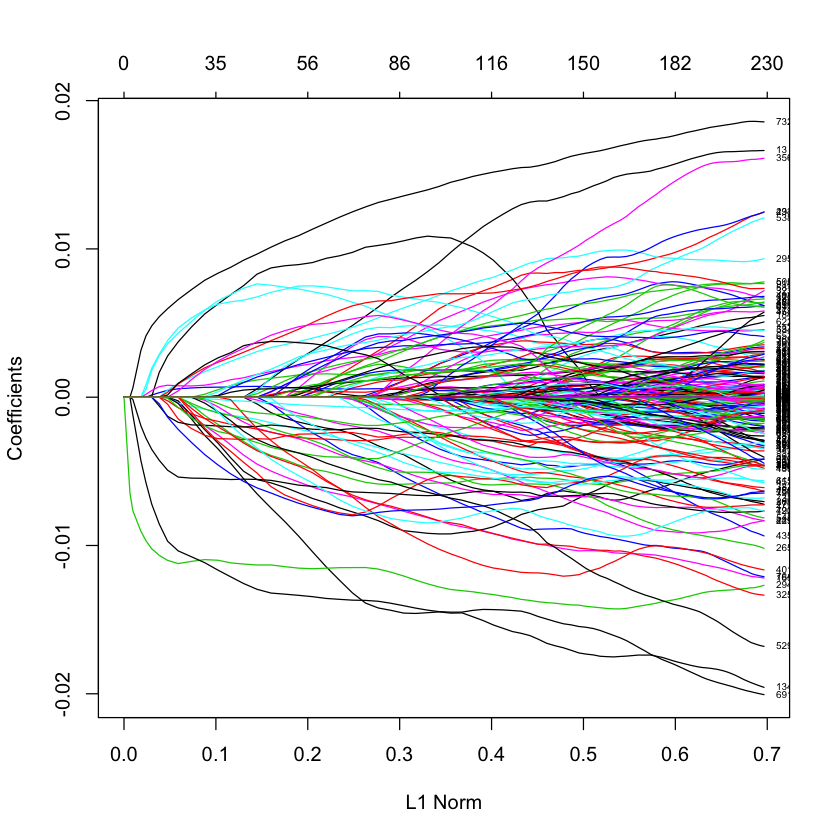

In [5]:
plot(fit, label=TRUE)  ## plot of regression coefficients as a function of the penalty.

In [6]:
temp <- fit$beta[,96][fit$beta[,96] != 0]
temp[order(temp, decreasing=T)]  ## the coefficients for the selected features 

near.futur      provid.opportun        figur.suggest 
        1.856567e-02         1.663543e-02         1.611186e-02 
        weak.quarter       togeth.continu      firm.manufactur 
        1.249518e-02         1.248176e-02         1.208899e-02 
         sterl.price          capit.stock        intent.fallen 
        9.338248e-03         7.775302e-03         7.655293e-03 
       inflat.higher         sheet.adjust    survey.manufactur 
        7.335304e-03         7.179572e-03         6.797878e-03 
       factor.behind       around.central significantli.higher 
        6.695766e-03         6.623602e-03         6.416683e-03 
            led.fall         boost.growth    data.particularli 
        6.347687e-03         6.176353e-03         6.165001e-03 
        bond.increas     fallen.substanti          higher.real 
        6.065092e-03         5.812846e-03         5.730883e-03 
   letter.chancellor           estim.euro        borrow.exclud 
        5.509102e-03         5.073492e-03         4.560372e-03 
        euro.depreci        month.possibl         increas.save 
        4.496395e-03         4.090624e-03         3.846148e-03 
     provid.committe       number.countri          growth.hous 
        3.687169e-03         3.535498e-03         3.388485e-03 
         rate.labour        return.around      slightli.faster 
        3.280299e-03         3.091292e-03         3.061542e-03 
       growth.import        stimul.demand          lead.higher 
        2.946443e-03         2.897141e-03         2.897051e-03 
          price.drop       mortgag.borrow         trend.growth 
        2.721788e-03         2.556518e-03         2.543660e-03 
   strengthen.balanc          rate.member     continu.recoveri 
        2.484095e-03         2.431653e-03         2.226848e-03 
          clear.evid         dollar.sterl          term.recent 
        2.207733e-03         2.162933e-03         2.158989e-03 
         away.target       output.quarter    improv.manufactur 
        2.084038e-03         2.026332e-03         1.811944e-03 
        evid.suggest     increas.competit        index.suggest 
        1.796019e-03         1.755780e-03         1.676186e-03 
         inflat.unit           base.indic        sector.employ 
        1.661697e-03         1.580993e-03         1.409532e-03 
           uk.govern         inflat.littl           rang.indic 
        1.393014e-03         1.369501e-03         1.348290e-03 
  settlement.januari         expect.short            rais.bank 
        1.326388e-03         1.222775e-03         1.086994e-03 
         remain.flat         retail.price         rate.possibl 
        8.705535e-04         8.611683e-04         8.406808e-04 
       inflat.inflat      largest.monthli     recoveri.continu 
        7.552012e-04         7.519212e-04         7.164792e-04 
         trade.reduc            rel.stabl          grow.faster 
        7.002794e-04         6.720320e-04         6.319331e-04 
          rate.revis      estim.construct        term.committe 
        6.136076e-04         5.441586e-04         5.317286e-04 
         time.novemb             data.yet         payrol.risen 
        5.298287e-04         4.944782e-04         4.880160e-04 
        month.around          bank.system          rate.provid 
        4.263183e-04         3.953658e-04         3.451581e-04 
        rate.depreci          part.recent           bank.money 
        3.091552e-04         3.070838e-04         3.044573e-04 
     strong.consumpt            lf.measur        growth.export 
        2.924071e-04         2.653174e-04         2.546081e-04 
      consist.report        import.factor         increas.cost 
        2.504631e-04         2.354161e-04         2.346205e-04 
       privat.sector         recent.month              may.cip 
        2.220320e-04         2.165574e-04         1.989399e-04 
        accord.bankâ           littl.euro            larg.rise 
        1.908607e-04         1.897722e-04         1.353740e-04 
        errat.factor       declin.sharpli 

In [7]:
cv.fit <- cv.glmnet(as.matrix(data.final[,-(1:9)]),
                    data.final$Gilt1yspot,
                    nfolds=nrow(data.final),
                    standardize=TRUE)

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

This is the call that will estimate LASSO and select a model (i.e. select $\lambda$) based on cross-validation. Here we perform $N$-fold cross-validation, so that each data point will form a test set.  We now only select one feature.

In [8]:
sum(coef(cv.fit, s="lambda.min") !=  0)

[1] 2

In [9]:
temp <- coef(cv.fit, s="lambda.min")
data.frame <- data.frame(name = temp@Dimnames[[1]][temp@i + 1], coefficient = temp@x)
data.frame[order(data.frame$coefficient, decreasing=T),]

name,coefficient
(Intercept),-0.001594457
financi.institut,-0.006460671
